In [3]:
import pandas as pd  
import collections
import numpy as np
from textblob import TextBlob # pip install -U textblob, python -m textblob.download_corpora
from textblob.classifiers import NaiveBayesClassifier
import nltk # pip install nltk, python -m textblob.download_corpora
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline # pip install -q transformers
import matplotlib.pyplot as plt

# making dataframe
df = pd.read_csv("data/sentiment140_with_location.csv", names=['target','id','date','flag','user','text', 'location'])  

df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


,target,id,date,flag,user,text,location
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",China
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Dominican Republic
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Germany
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Brazil
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Argentina
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Japan
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Spain
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Nigeria
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Argentina


In [4]:
# split dataset
shuffled = df.sample(frac = 1)
result = np.array_split(shuffled, 8)
split_df = result[0]
split_df

,target,id,date,flag,user,text,location
263409,0,1986523010,Sun May 31 18:57:18 PDT 2009,NO_QUERY,elephox,"Lost my job Oh well, that just means somethin...",Argentina
646638,0,2236562715,Fri Jun 19 04:01:00 PDT 2009,NO_QUERY,grungystudent,My fabulous day has a cloud. I'm trying very ...,Thailand
1431320,4,2060067414,Sat Jun 06 18:11:40 PDT 2009,NO_QUERY,Clairesy,@THE_REAL_SHAQ that's not a word it's a phrase,Tanzania
749481,0,2285089370,Mon Jun 22 14:41:39 PDT 2009,NO_QUERY,alixandramarric,Art museums are closed,USA
1140858,4,1977103294,Sat May 30 20:06:35 PDT 2009,NO_QUERY,ifoxmedia,I'm using this strategy right now --&gt; http...,South Africa
...,...,...,...,...,...,...,...
337746,0,2014279025,Wed Jun 03 01:00:41 PDT 2009,NO_QUERY,laaaaaaneee,"@cathy_cochina40 awww, that sucks! u can slee...",Chile
128632,0,1834943933,Mon May 18 04:41:20 PDT 2009,NO_QUERY,SilenceDesired,I am probably a procrastinator or might am tra...,Jamaica
333650,0,2013393350,Tue Jun 02 22:34:07 PDT 2009,NO_QUERY,sofieeeee,"Goede morgennnnnn, where are you sunshine?",Japan
1273366,4,2000838971,Mon Jun 01 23:06:02 PDT 2009,NO_QUERY,luisa8sabers,If anyone nows anything about (in french cause...,New Zealand


In [7]:
target_counts = collections.Counter(result[0]['target'])
location_counts = collections.Counter(result[0]['location'])
print("target counts: ", target_counts)
print("location_counts: ", location_counts)

target counts:  Counter({0: 100154, 4: 99846})
location_counts:  Counter({'Russia': 6221, 'Thailand': 6194, 'Ethiopia': 6155, 'Chile': 6141, 'Germany': 6138, 'Cuba': 6137, 'Antarctica': 6126, 'South Korea': 6118, 'Italy': 6112, 'China': 6108, 'Nigeria': 6107, 'UK': 6104, 'Mexico': 6085, 'Argentina': 6083, 'USA': 6076, 'Ecuador': 6071, 'Indonesia': 6070, 'Colombia': 6043, 'Spain': 6038, 'Japan': 6033, 'Canada': 6030, 'Australia': 6026, 'South Africa': 6017, 'Tanzania': 6009, 'Egypt': 6007, 'Peru': 6002, 'India': 6000, 'France': 5988, 'Jamaica': 5987, 'New Zealand': 5969, 'Brazil': 5952, 'Kenya': 5929, 'Dominican Republic': 5924})


In [8]:
def locationSentiment(data, location):
    """
    input: location is the input location of interest
    output: the average sentiment of the tweets for a location
    """
    # go through the dataframe filtered by location
    # get the average sentiment of the tweets in that location by getting sum and dividing by number of rows
    location_data = data[data["location"] == location]
    total_sentiment_value = sum(list(location_data["target"]))
    return total_sentiment_value/len(location_data)

def getLocationTweetsWithSentiment(data, location):
    tweets_with_sentiment = []
    location_data = data[data["location"] == location]
    for row in location_data.iterrows():
        sentiment = row[1]['target']
        text = row[1]['text']
        sentiment_for_classifier = ""
        if sentiment == 0:
            # negative
            sentiment_for_classifier = "neg"
        elif sentiment == 4:
            # positive
            sentiment_for_classifier = "pos"
        tweets_with_sentiment.append((text,sentiment_for_classifier))
    return tweets_with_sentiment

# print(locationSentiment(result[0], "China"))
tweets = getLocationTweetsWithSentiment(result[0], "China")
print(tweets)


[('@majornelson I expect stern words to Gamespot for ruining keynote surprises major! ;) I sure hope MS has got more up their sleeves.  - AB', 'pos'), ('is searching for the &quot;dislike&quot; button on Facebook for having to work on a Sunday evening. Boo! ', 'neg'), ('Feel like shit!!! Vacay is offically over!!! Gotta work today! ', 'neg'), ('@__kaykay already one week ago...  how the time flies... SHAKE THE GLITTER! ', 'neg'), ('Working from home today, my back is killing me  Doctor and then physio after later today.', 'neg'), ("Wish I didn't have to move   Oh well, can't stay there anymore", 'neg'), ('Ah jaggers gone home  i miss him, only 12 days till i see him again haha,   6 days till saving aimee, 26 days till mcfly , Lils Back!', 'pos'), ("@bianxbautista That movie made me and Ryce cry. It's nice.. ", 'neg'), ("@andrewbarnett One step ahead of me, still no income, looking at car rego, insurance &amp; electricity bills on fridge 2k I don't have ", 'neg'), ('I am waiting for my 

In [9]:
# find average sentiment for each location and store in location_scores
location_scores = {}

for (location, count) in location_counts.items():
    score = locationSentiment(result[0], location)
    location_scores[location] = score

# code sourced from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sorted_location_scores = {k: v for k, v in sorted(location_scores.items(), key=lambda item: item[1])}
sorted_location_scores

{'France': 1.957247828991316,
 'Germany': 1.9674160964483545,
 'India': 1.968,
 'China': 1.9698755730189914,
 'Ethiopia': 1.9704305442729488,
 'Ecuador': 1.9713391533520013,
 'Chile': 1.976225370460837,
 'Russia': 1.97717408776724,
 'Australia': 1.9780949220046464,
 'Italy': 1.9784031413612566,
 'New Zealand': 1.9802311945049422,
 'South Korea': 1.980385746976136,
 'Thailand': 1.9819179851469164,
 'UK': 1.9823066841415464,
 'Brazil': 1.9852150537634408,
 'Tanzania': 1.9856881344649693,
 'Jamaica': 1.9863036579255053,
 'Spain': 1.9867505796621399,
 'Cuba': 1.9912009124979633,
 'Kenya': 1.9922415247090572,
 'USA': 1.9947333772218565,
 'Dominican Republic': 1.9959486833220796,
 'Canada': 2.009950248756219,
 'Antarctica': 2.0169768201110023,
 'Japan': 2.0215481518315928,
 'South Africa': 2.02692371613761,
 'Colombia': 2.027469799768327,
 'Nigeria': 2.030456852791878,
 'Mexico': 2.0358258011503696,
 'Argentina': 2.0391254315304947,
 'Peru': 2.0419860046651115,
 'Indonesia': 2.04546952224052

In [10]:
# drop unnecessary columns
split_df = split_df.drop(['id', 'date', 'flag', 'user'], axis=1)

split_df

,target,text,location
263409,0,"Lost my job Oh well, that just means somethin...",Argentina
646638,0,My fabulous day has a cloud. I'm trying very ...,Thailand
1431320,4,@THE_REAL_SHAQ that's not a word it's a phrase,Tanzania
749481,0,Art museums are closed,USA
1140858,4,I'm using this strategy right now --&gt; http...,South Africa
...,...,...,...
337746,0,"@cathy_cochina40 awww, that sucks! u can slee...",Chile
128632,0,I am probably a procrastinator or might am tra...,Jamaica
333650,0,"Goede morgennnnnn, where are you sunshine?",Japan
1273366,4,If anyone nows anything about (in french cause...,New Zealand


In [18]:
dataset = getLocationTweetsWithSentiment(result[0], "USA")
train = dataset[:int(0.8*len(dataset))] # change this so that its actually a train test split 
test = dataset[int(0.8*len(dataset)):]

In [8]:
# Naive Bayes Classifier
cl = NaiveBayesClassifier(train) # train needs tuples of text and pos/neg
correct = 0
for text, sentiment in test:
    pred = cl.classify(text)
    correct += (pred == sentiment)
print(correct/len(test))


0.7160292921074044


In [10]:
# nltk sentiment intensity analyzer model
# 51% accuracy

sia = SentimentIntensityAnalyzer()
correct = 0
neu_count = 0
for text, sentiment in test:
    sia_pred = sia.polarity_scores(text)
    if sia_pred["compound"] < 0:
        pred = "neg"
    elif sia_pred["compound"] > 0:
        pred = "pos"
    else:
        pred = "neu"
        neu_count += 1
    correct += (pred == sentiment)

print("accuracy:", correct/len(test))
print("neu %:", neu_count/len(test))


accuracy: 0.4890154597233523
neu %: 0.2872253864930838


In [19]:
# this takes a while to run (took 3 min for me)

# hugging face transformer model
# 50% accuracy
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

correct = 0
data = [text for text, sentiment in test]

results = specific_model(data)

print(results)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'NEG', 'score': 0.9708226919174194}, {'label': 'POS', 'score': 0.7198372483253479}, {'label': 'NEG', 'score': 0.7635279893875122}, {'label': 'NEU', 'score': 0.9581220746040344}, {'label': 'POS', 'score': 0.7448132038116455}, {'label': 'POS', 'score': 0.9900216460227966}, {'label': 'POS', 'score': 0.9924537539482117}, {'label': 'NEU', 'score': 0.5253078937530518}, {'label': 'NEG', 'score': 0.8741335868835449}, {'label': 'NEG', 'score': 0.9798495769500732}, {'label': 'POS', 'score': 0.9780052304267883}, {'label': 'POS', 'score': 0.992514431476593}, {'label': 'POS', 'score': 0.9744259715080261}, {'label': 'POS', 'score': 0.990535318851471}, {'label': 'POS', 'score': 0.9132381081581116}, {'label': 'NEU', 'score': 0.834323525428772}, {'label': 'POS', 'score': 0.933764636516571}, {'label': 'POS', 'score': 0.9754745364189148}, {'label': 'NEU', 'score': 0.6178470253944397}, {'label': 'POS', 'score': 0.9931580424308777}, {'label': 'NEU', 'score': 0.6322077512741089}, {'label': 'NEU',

In [20]:
# calculations for above model
correct = 0
# neu_count = 0
for i in range(len(results)):
    label = results[i]['label'].lower()
    sentiment = test[i][1]
    if label == 'neu':
        # neu_count += 1
        label = "pos"
    correct += (label == sentiment)

print("accuracy:", correct/len(test))
# print("neu %:", neu_count/len(test))

accuracy: 0.71875


things to note about dataset:
- no "0" or "neutral" labels



data clean up:

- remove links from tweets, something like:
tweets = [t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings()]

- remove tweets that don't have a location


TODO: 
* Location sentiment scores
* bar graphs for sentiment by location


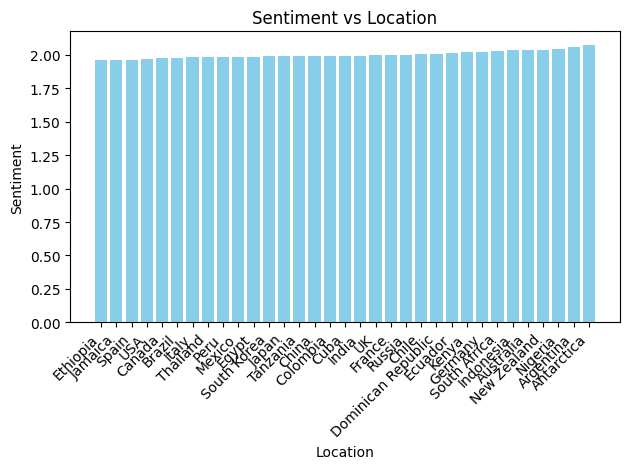

In [15]:
def plot_bar_graph(locations_with_sentiments):
    """
    input: locations with sentiments is a dictionary with the keys being the locations and the values is the sentiment
    """
    locations_list = (list(locations_with_sentiments.keys()))
    # sentiment_list = list(locations_with_sentiments.values())
    sentiment_list = list(locations_with_sentiments.values())

    # Plotting
    plt.bar(locations_list, sentiment_list, color='skyblue')
    plt.xlabel('Location')
    plt.ylabel('Sentiment')
    plt.title('Sentiment vs Location')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


# sorted_location_scores

plot_bar_graph(sorted_location_scores)

In [23]:
# only done for naive bayes so far
def averageSentimentByLocation(location):
    dataset = getLocationTweetsWithSentiment(result[0], location)
    train = dataset[:int(0.8*len(dataset))] # change this so that its actually a train test split 
    test = dataset[int(0.8*len(dataset)):]
    # naive bayes
    naive_bayes = NaiveBayesClassifier(train)
    total_sentiment = 0
    true_sentiment = 0
    for text, sentiment in test:
        pred = naive_bayes.classify(text)
        if sentiment == "pos":
            true_sentiment += 4
        if pred == "pos":
            total_sentiment += 4
        if pred == "neu":
            total_sentiment += 2
        # negative is still just value 0
    average_sentiment = total_sentiment/len(test)
    average_true = true_sentiment/len(test)
    print("average true sentiment ", average_true)
    return average_sentiment
    
# averageSentimentByLocation('China')

In [ ]:
import nltk
nltk.download(["names", "stopwords", "state_union", "twitter_samples", "movie_reviews", "averaged_perceptron_tagger", "vader_lexicon","punkt",])

[nltk_data] <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED]
[nltk_data]     certificate verify failed: unable to get local issuer
[nltk_data]     certificate (_ssl.c:997)>


False

In [25]:
# SentimentIntensityAnalyzer (pre-trained)
def averageSentimentByLocation_sia(location):
    dataset = getLocationTweetsWithSentiment(result[0], location)
    test = dataset[int(0.8*len(dataset)):]
    sia = SentimentIntensityAnalyzer()
    total_sentiment = 0
    # using test so we can compare scores across models
    for text, _ in test:
        sia_pred = sia.polarity_scores(text)
        if sia_pred["compound"] > 0:
            total_sentiment += 4
        elif sia_pred["compound"] == 0:
            total_sentiment += 2
    average_sentiment = total_sentiment/len(dataset)
    return average_sentiment

# averageSentimentByLocation_sia('China')
    

In [24]:
# hugging face transformer model (pre-trained)
def averageSentimentByLocation_hf(location):
    dataset = getLocationTweetsWithSentiment(result[0], location)
    specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
    # note: model can only take 204 or 128 items in dataset, so only using test
    data = [text for text, sentiment in test]
    results = specific_model(data)

    print(results)
    total_sentiment = 0
    for r in results:
        label = r['label'].lower()
        if label == 'pos':
            total_sentiment += 4
        if label == 'neu':
            total_sentiment += 2
    average_sentiment = total_sentiment/len(dataset)
    return average_sentiment

# averageSentimentByLocation_hf('China')

average true sentiment  2.004954582989265


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'NEG', 'score': 0.9757653474807739}, {'label': 'NEG', 'score': 0.7707419395446777}, {'label': 'NEG', 'score': 0.5858238339424133}, {'label': 'POS', 'score': 0.7250548601150513}, {'label': 'NEG', 'score': 0.92391037940979}, {'label': 'NEG', 'score': 0.8524266481399536}, {'label': 'POS', 'score': 0.9872287511825562}, {'label': 'POS', 'score': 0.9917553663253784}, {'label': 'NEG', 'score': 0.9730477929115295}, {'label': 'POS', 'score': 0.9643010497093201}, {'label': 'POS', 'score': 0.9924058318138123}, {'label': 'POS', 'score': 0.992975115776062}, {'label': 'NEU', 'score': 0.8420159220695496}, {'label': 'NEU', 'score': 0.7305477261543274}, {'label': 'POS', 'score': 0.977120041847229}, {'label': 'NEG', 'score': 0.4977229833602905}, {'label': 'NEG', 'score': 0.9709560871124268}, {'label': 'NEU', 'score': 0.8865233063697815}, {'label': 'POS', 'score': 0.9835102558135986}, {'label': 'NEU', 'score': 0.9652674794197083}, {'label': 'NEG', 'score': 0.9553222060203552}, {'label': 'NEU',

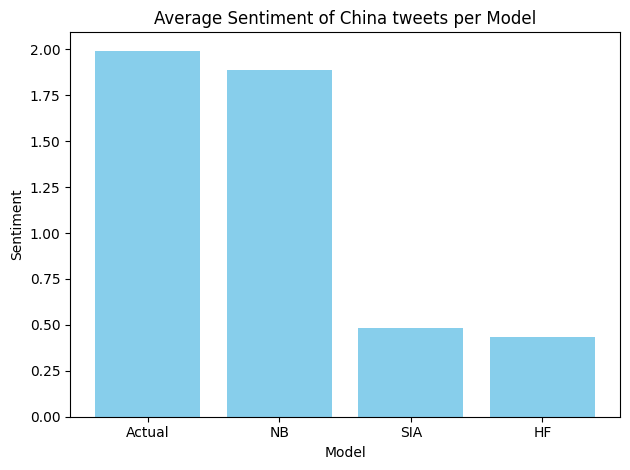

In [19]:
def plotBarGraph_locSent(location, original_sentiments):
    """
    input: location of interest
    """
    true_sentiment = original_sentiments[location]
    nb_sentiment = averageSentimentByLocation(location)
    sia_sentiment = averageSentimentByLocation_sia(location)
    hf_sentiment = averageSentimentByLocation_hf(location)

    model_names = ["Actual", "NB", "SIA", "HF"] # add this in "Sentiment Intensity Analyzer"
    sentiment_values = [true_sentiment, nb_sentiment, sia_sentiment, hf_sentiment] # add this in sia_sentiment 
    # Plotting
    plt.bar(model_names, sentiment_values, color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Sentiment')
    plt.title(f'Average Sentiment of {location} tweets per Model')
    # plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

plotBarGraph_locSent("China", sorted_location_scores)

average true sentiment  2.031905961376994


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'NEG', 'score': 0.9757653474807739}, {'label': 'NEG', 'score': 0.7707419395446777}, {'label': 'NEG', 'score': 0.5858238339424133}, {'label': 'POS', 'score': 0.7250548601150513}, {'label': 'NEG', 'score': 0.92391037940979}, {'label': 'NEG', 'score': 0.8524266481399536}, {'label': 'POS', 'score': 0.9872287511825562}, {'label': 'POS', 'score': 0.9917553663253784}, {'label': 'NEG', 'score': 0.9730477929115295}, {'label': 'POS', 'score': 0.9643010497093201}, {'label': 'POS', 'score': 0.9924058318138123}, {'label': 'POS', 'score': 0.992975115776062}, {'label': 'NEU', 'score': 0.8420159220695496}, {'label': 'NEU', 'score': 0.7305477261543274}, {'label': 'POS', 'score': 0.977120041847229}, {'label': 'NEG', 'score': 0.4977229833602905}, {'label': 'NEG', 'score': 0.9709560871124268}, {'label': 'NEU', 'score': 0.8865233063697815}, {'label': 'POS', 'score': 0.9835102558135986}, {'label': 'NEU', 'score': 0.9652674794197083}, {'label': 'NEG', 'score': 0.9553222060203552}, {'label': 'NEU',

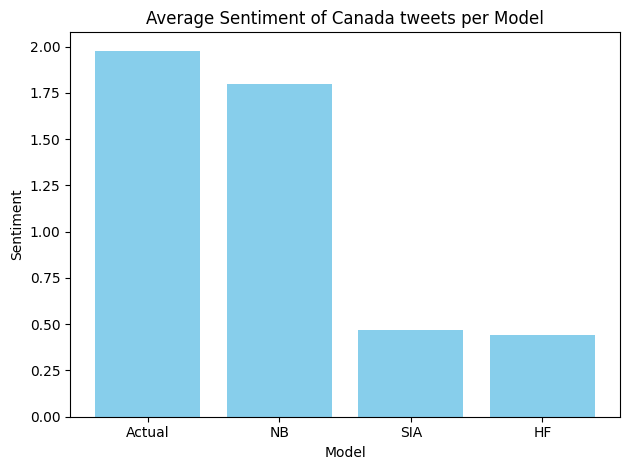

In [20]:
plotBarGraph_locSent("Canada", sorted_location_scores)

average true sentiment  1.9170056956875507


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'NEG', 'score': 0.9757653474807739}, {'label': 'NEG', 'score': 0.7707419395446777}, {'label': 'NEG', 'score': 0.5858238339424133}, {'label': 'POS', 'score': 0.7250548601150513}, {'label': 'NEG', 'score': 0.92391037940979}, {'label': 'NEG', 'score': 0.8524266481399536}, {'label': 'POS', 'score': 0.9872287511825562}, {'label': 'POS', 'score': 0.9917553663253784}, {'label': 'NEG', 'score': 0.9730477929115295}, {'label': 'POS', 'score': 0.9643010497093201}, {'label': 'POS', 'score': 0.9924058318138123}, {'label': 'POS', 'score': 0.992975115776062}, {'label': 'NEU', 'score': 0.8420159220695496}, {'label': 'NEU', 'score': 0.7305477261543274}, {'label': 'POS', 'score': 0.977120041847229}, {'label': 'NEG', 'score': 0.4977229833602905}, {'label': 'NEG', 'score': 0.9709560871124268}, {'label': 'NEU', 'score': 0.8865233063697815}, {'label': 'POS', 'score': 0.9835102558135986}, {'label': 'NEU', 'score': 0.9652674794197083}, {'label': 'NEG', 'score': 0.9553222060203552}, {'label': 'NEU',

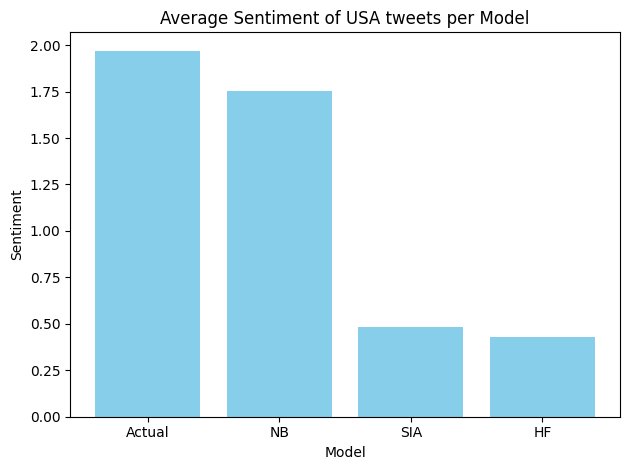

In [21]:
plotBarGraph_locSent("USA", sorted_location_scores)

average true sentiment  1.981651376146789


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'NEG', 'score': 0.9757653474807739}, {'label': 'NEG', 'score': 0.7707419395446777}, {'label': 'NEG', 'score': 0.5858238339424133}, {'label': 'POS', 'score': 0.7250548601150513}, {'label': 'NEG', 'score': 0.92391037940979}, {'label': 'NEG', 'score': 0.8524266481399536}, {'label': 'POS', 'score': 0.9872287511825562}, {'label': 'POS', 'score': 0.9917553663253784}, {'label': 'NEG', 'score': 0.9730477929115295}, {'label': 'POS', 'score': 0.9643010497093201}, {'label': 'POS', 'score': 0.9924058318138123}, {'label': 'POS', 'score': 0.992975115776062}, {'label': 'NEU', 'score': 0.8420159220695496}, {'label': 'NEU', 'score': 0.7305477261543274}, {'label': 'POS', 'score': 0.977120041847229}, {'label': 'NEG', 'score': 0.4977229833602905}, {'label': 'NEG', 'score': 0.9709560871124268}, {'label': 'NEU', 'score': 0.8865233063697815}, {'label': 'POS', 'score': 0.9835102558135986}, {'label': 'NEU', 'score': 0.9652674794197083}, {'label': 'NEG', 'score': 0.9553222060203552}, {'label': 'NEU',

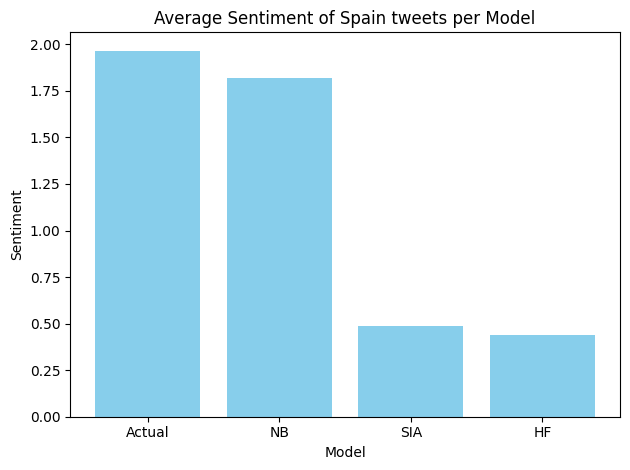

In [22]:
plotBarGraph_locSent("Spain", sorted_location_scores)

In [27]:
all_location_counts = collections.Counter(df['location'])
all_location_counts.total()

1600000

In [26]:
def plotBarGraph_model(model, original_sentiments):
    """
    input: model of interest
    """
    locations = ["USA", "China", "Canada", "Spain"]
    true_sentiment = original_sentiments[location]
    nb_sentiment = averageSentimentByLocation(location)
    sia_sentiment = averageSentimentByLocation_sia(location)
    hf_sentiment = averageSentimentByLocation_hf(location)

    model_names = ["Actual", "NB", "SIA", "HF"] # add this in "Sentiment Intensity Analyzer"
    sentiment_values = [true_sentiment, nb_sentiment, sia_sentiment, hf_sentiment] # add this in sia_sentiment 
    # Plotting
    plt.bar(model_names, sentiment_values, color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Sentiment')
    plt.title(f'Average Sentiment Prediction of {model} for 4 countries')
    # plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

plotBarGraph_locSent("China", sorted_location_scores)

KeyboardInterrupt: 

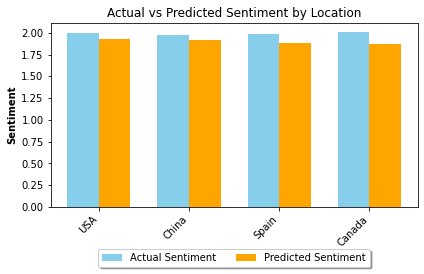

In [32]:
def plot_grouped_bar(locations, actual_sentiments, predicted_sentiments):
    actual_sentiments_list = list(actual_sentiments.values())
    predicted_sentiments_list = list(predicted_sentiments.values())

    # Set the width of the bars
    bar_width = 0.35

    # Set the position of the bars on the x-axis
    r1 = np.arange(len(locations))
    r2 = [x + bar_width for x in r1]

    # Plotting
    plt.bar(r1, actual_sentiments_list, color='skyblue', width=bar_width, label='Actual Sentiment')
    plt.bar(r2, predicted_sentiments_list, color='orange', width=bar_width, label='Predicted Sentiment')

    # Add xticks on the middle of the group bars
    plt.xlabel('Location', fontweight='bold')
    plt.ylabel('Sentiment', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(locations))], locations, rotation=45, ha='right')

    # Create legend & Show graphic
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)
    plt.title('Actual vs Predicted Sentiment by Location')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


predicted_sentiments
actual_sentiments
plot_grouped_bar(locations, actual_sentiments, predicted_sentiments)

In [ ]:
locations = ["USA", "China", "Spain", "Canada"]
actual_sentiments = {
    'USA': sorted_location_scores["USA"],
    'China': sorted_location_scores["China"],
    'Spain': sorted_location_scores["Spain"],
    'Canada': sorted_location_scores["Canada"]}

predicted_sentiments = {
    'USA': averageSentimentByLocation("USA"),
    'China': averageSentimentByLocation("China"),
    'Spain': averageSentimentByLocation("Spain"),
    'Canada': averageSentimentByLocation("Canada")
}
# plot_grouped_bar(locations, actual_sentiments, predicted_sentiments)